In [1]:
import io
import re
import nltk
from nltk import *
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as soup
import lxml
import requests

stopWords = set(stopwords.words('english'))

Data Gathering and pre-processing

In [2]:
testString = """This is a sample sentence,showing off the stop words filtration.""" #This is a sample string to tokenize 

file1 = open("testFile.txt", "r") #testFile consist of a random paragraph
textFile = file1.read()

url = 'https://www.gutenberg.org/files/69856/69856-h/69856-h.htm'
r = requests.get(url)
html = r.text

text = soup(html, "lxml")
textHTML = text.get_text()

In [3]:
testString, textFile, textHTML = testString.lower(), textFile.lower(), textHTML.lower() #convert the text in the string and the file to lowercase

Tokenization

In [4]:
def token(testString, testFile, testHTML):
    wordsString = word_tokenize(testString)
    wordsFile = word_tokenize(testFile)
    wordsHTML = word_tokenize(testHTML)

    print("The length of String is ", len(wordsString))
    print("The length of File is ", len(wordsFile))
    print("The length of HTML is ", len(wordsHTML))
    return wordsString, wordsFile, wordsHTML

Punctuation removal

In [5]:
def punctuationRemoval(wordsString, wordsFile, wordsHTML):
    wordsString_no_punc = []
    wordsFile_no_punc = []
    wordsHTML_no_punc = []

    #iterate through the words list to remove punctuations
    for i in wordsString:
        if i.isalpha():
            wordsString_no_punc.append(i)
    for j in wordsFile:
        if j.isalpha():
            wordsFile_no_punc.append(j)
    for k in wordsHTML:
        if k.isalpha():
            wordsHTML_no_punc.append(k)
    return wordsString_no_punc, wordsFile_no_punc, wordsHTML_no_punc
    

Frequency Distrubution

In [6]:
def frequency(wordsString, wordsFile, wordsHTML):
    fdistString = FreqDist(wordsString)
    fdistFile = FreqDist(wordsFile)
    fdistHTML = FreqDist(wordsHTML)
    return fdistString.most_common(5), fdistFile.most_common(5), fdistHTML.most_common(5)

StopWord removal

In [7]:
def StopWords(wordsString,wordsFile,wordsHTML):
    clearedString = []
    clearedFile = []
    clearedHTML = []
    for i in wordsString:
        if i not in stopWords:
            clearedString.append(i)
    for j in wordsFile:
        if j not in stopWords:
            clearedFile.append(j)
    for k in wordsHTML:
        if k not in stopWords:
            clearedHTML.append(k)
    return clearedString, clearedFile, clearedHTML

Plotting the frequency distribution

In [8]:
def plot(wordsString, wordsFile,wordsHTML):
    FreqDist(wordsString).plot(10)
    FreqDist(wordsFile).plot(10) 
    FreqDist(wordsHTML).plot(10)
    return plt.show()

Main Code

In [9]:
wordsString, wordsFile, wordsHTML = token(testString, textFile, textHTML)

The length of String is  13
The length of File is  124
The length of HTML is  17352


In [10]:
wordsString, wordsFile, wordsHTML = punctuationRemoval(wordsString, wordsFile, wordsHTML)

In [11]:
frequency(wordsString, wordsFile, wordsHTML)

([('this', 1), ('is', 1), ('a', 1), ('sample', 1), ('sentence', 1)],
 [('that', 6), ('in', 5), ('me', 4), ('my', 3), ('and', 3)],
 [('the', 988), ('of', 690), ('and', 438), ('is', 400), ('a', 348)])

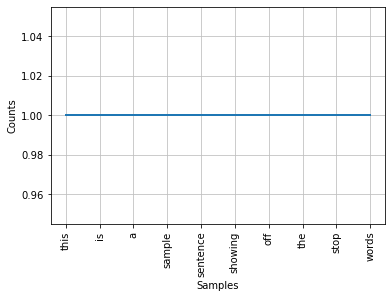

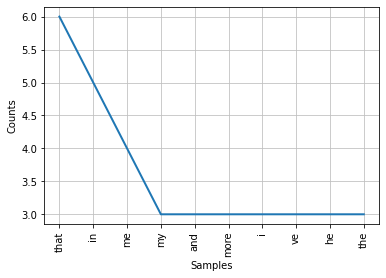

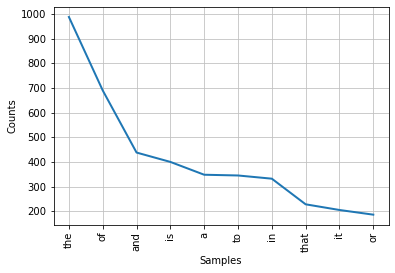

In [12]:
plot(wordsString, wordsFile, wordsHTML)

In [13]:
clearedString, clearedFile, clearedHTML = StopWords(wordsString, wordsFile, wordsHTML)
StopWords(wordsString, wordsFile, wordsHTML)

(['sample', 'sentence', 'showing', 'stop', 'words', 'filtration'],
 ['younger',
  'vulnerable',
  'years',
  'father',
  'gave',
  'advice',
  'turning',
  'mind',
  'ever',
  'since',
  'whenever',
  'feel',
  'like',
  'criticizing',
  'anyone',
  'told',
  'remember',
  'people',
  'world',
  'advantages',
  'say',
  'always',
  'unusually',
  'communicative',
  'reserved',
  'way',
  'understood',
  'meant',
  'great',
  'deal',
  'consequence',
  'inclined',
  'reserve',
  'judgements',
  'habit',
  'opened',
  'many',
  'curious',
  'natures',
  'also',
  'made',
  'vi'],
 ['orpheus',
  'project',
  'gutenberg',
  'ebook',
  'project',
  'gutenberg',
  'ebook',
  'orpheus',
  'turner',
  'ebook',
  'use',
  'anyone',
  'anywhere',
  'united',
  'states',
  'parts',
  'world',
  'cost',
  'almost',
  'restrictions',
  'whatsoever',
  'may',
  'copy',
  'give',
  'away',
  'terms',
  'project',
  'gutenberg',
  'license',
  'included',
  'ebook',
  'online',
  'located',
  'united'

In [14]:
frequency(clearedString, clearedFile,clearedHTML)

([('sample', 1), ('sentence', 1), ('showing', 1), ('stop', 1), ('words', 1)],
 [('younger', 1), ('vulnerable', 1), ('years', 1), ('father', 1), ('gave', 1)],
 [('music', 132), ('pg', 91), ('project', 89), ('life', 65), ('may', 58)])

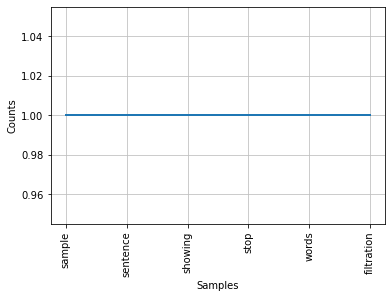

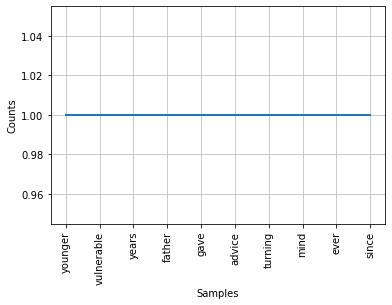

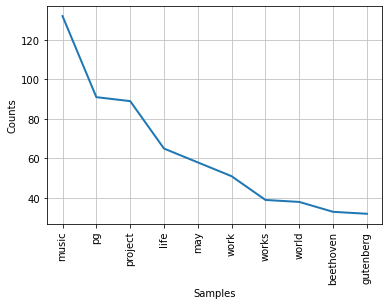

In [15]:
plot(clearedString, clearedFile,clearedHTML)